In [19]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import nltk
import seaborn as sns
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
from collections import Counter
from sklearn.naive_bayes import MultinomialNB as mnb
from sklearn.naive_bayes import GaussianNB as gnb
from sklearn.naive_bayes import BernoulliNB as bnb
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score , confusion_matrix , precision_score 
import random

In [20]:
df=pd.read_csv("spam.csv",encoding='latin1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


## Data Cleaning

In [21]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [23]:

df.drop(columns=df.iloc[:,[2,3,4]],inplace=True)
df.sample(6)

,v1,v2
5207,ham,"Babe, I'm answering you, can't you see me ? Ma..."
147,ham,Ummma.will call after check in.our life will b...
5076,ham,"Guy, no flash me now. If you go call me, call ..."
4824,ham,I am going to sleep. I am tired of travel.
382,ham,Hey leave it. not a big deal:-) take care.
5470,ham,I thought slide is enough.


In [24]:
df.rename(columns={'v1':'target','v2':'input'},inplace=True)
df.sample(5)

,target,input
4866,ham,Okey dokey swashbuckling stuff what oh.
1850,ham,Then cant get da laptop? My matric card wif Ì_...
870,ham,"Well am officially in a philosophical hole, so..."
4768,ham,watever reLation u built up in dis world only ...
550,ham,Imagine you finally get to sink into that bath...


In [25]:
encoder=LabelEncoder()
df['target']=encoder.fit_transform(df['target'])

df.head()

,target,input
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [26]:
df.isnull().sum()

target    0
input     0
dtype: int64

In [27]:
df.duplicated().sum()

np.int64(403)

In [28]:
df=df.drop_duplicates(keep='first')


In [29]:
df.duplicated().sum()

np.int64(0)

In [30]:
df.shape


(5169, 2)

## Exploratory Data Analysis

In [31]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

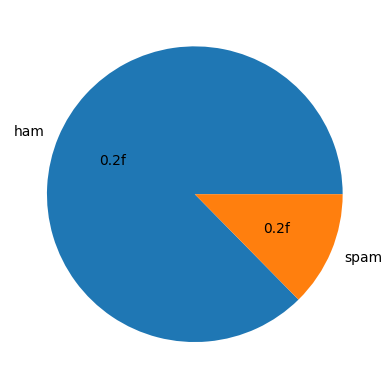

In [32]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="0.2f")
plt.show()

In [33]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sujal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [34]:
df['num_char']=df['input'].apply(len)

In [35]:
df['num_words']=df['input'].apply(lambda x:len(nltk.word_tokenize(x)))

In [36]:
df['sentence']=df['input'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [37]:
df.head()

,target,input,num_char,num_words,sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [38]:
df.iloc[:,[2,3,4]].describe()

,num_char,num_words,sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [39]:
# for ham

df[df['target']==0].iloc[:,[2,3,4]].describe()

,num_char,num_words,sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [40]:
#for spam

df[df['target']==1].iloc[:,[2,3,4]].describe()

,num_char,num_words,sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


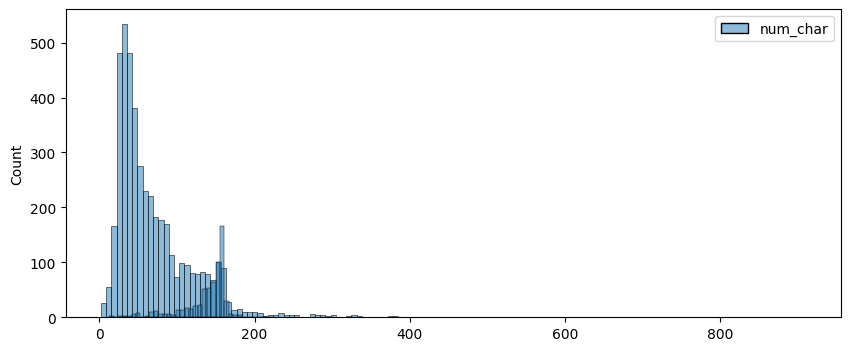

In [41]:
plt.figure(figsize=(10,4))

sns.histplot(df[df['target']==0][['num_char']])
sns.histplot(df[df['target']==1][['num_char']],color="red")

plt.show()

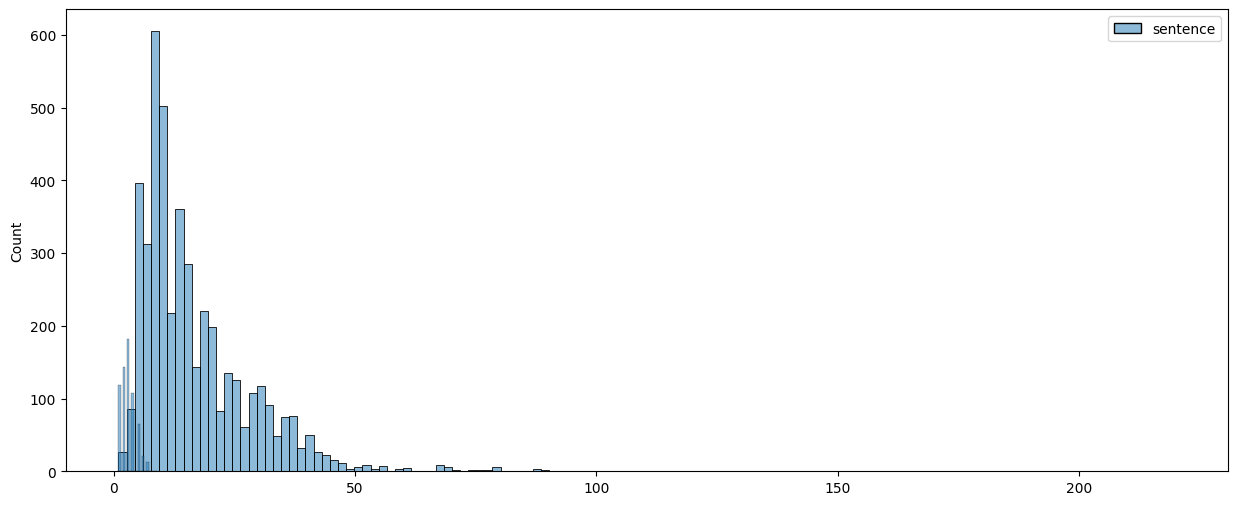

In [42]:
plt.figure(figsize=(15,6))

sns.histplot(df[df['target']==0][['num_words']])
sns.histplot(df[df['target']==1][['sentence']],color="red")

plt.show()

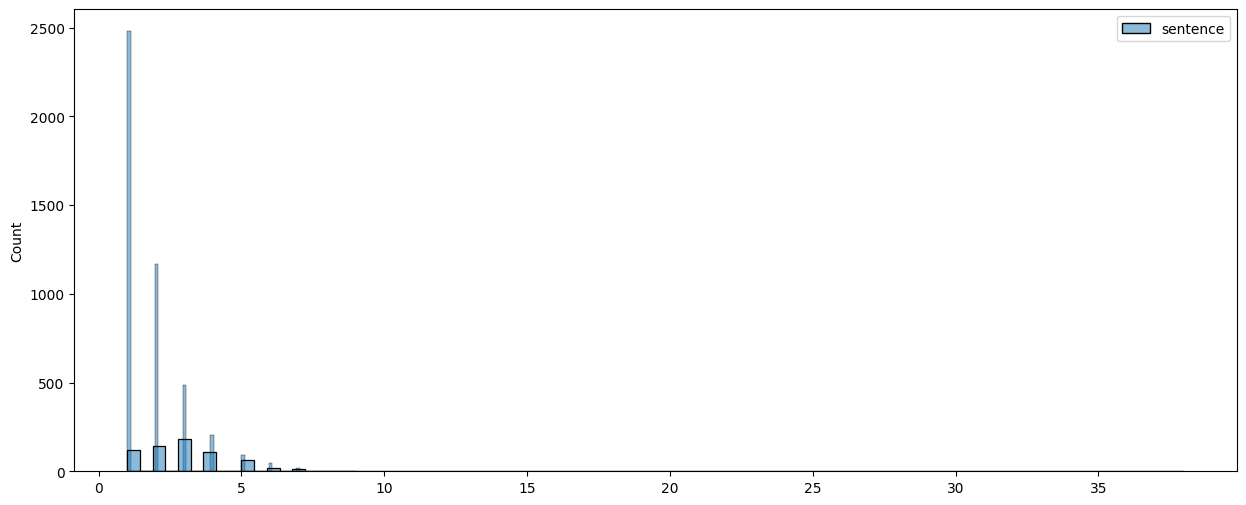

In [43]:
plt.figure(figsize=(15,6))

sns.histplot(df[df['target']==0][['sentence']])
sns.histplot(df[df['target']==1][['sentence']],color="red")

plt.show()

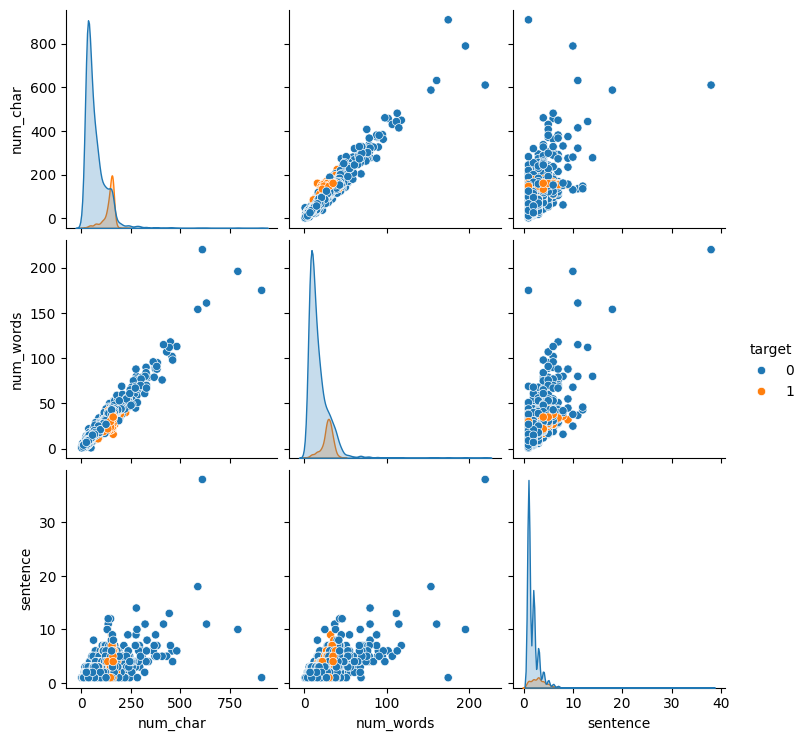

In [44]:
sns.pairplot(df,hue="target")

<Axes: >

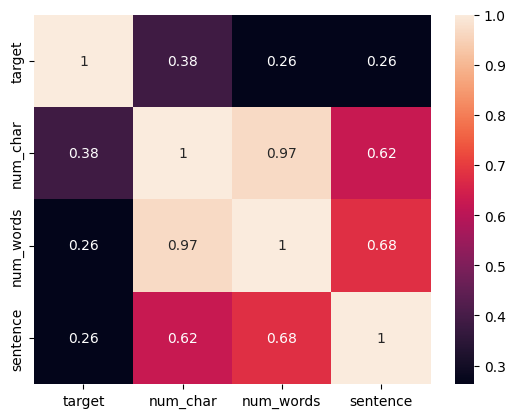

In [45]:
c=df.drop(columns='input').corr()

sns.heatmap(c,annot=True)

## Data Preprocessing

In [46]:
ps=PorterStemmer()

In [47]:
def transform_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Tokenize text
    text = nltk.word_tokenize(text)
    
    y = []
    # Keep only alphanumeric tokens
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    # Remove stopwords and punctuation
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text = y[:]
    y.clear()
    
    # Apply stemming
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)


In [48]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords, StringCategoryCorpusReader

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sujal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [49]:
transform_text("What is this and what is happening here ++**^%^%")

'happen'

In [50]:
df['transformed_text']=df['input'].apply(transform_text)

In [51]:
df

,target,input,num_char,num_words,sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


In [52]:
wc=WordCloud(width=500,height=500,min_font_size=10,background_color="white")

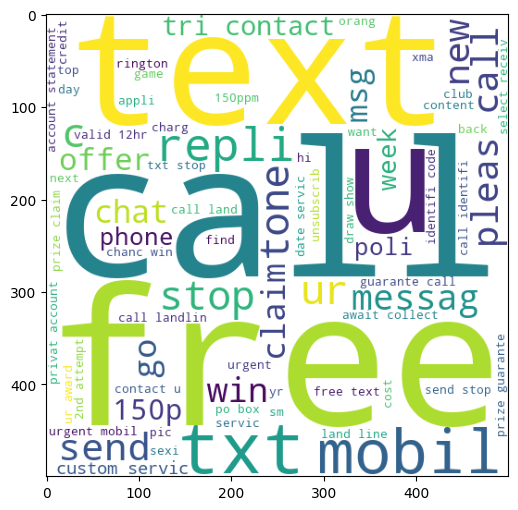

In [53]:
plt.figure(figsize=(15,6))

spam=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))
plt.imshow(spam)

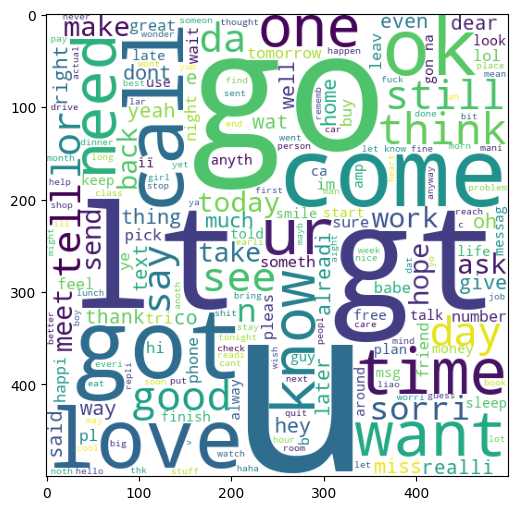

In [54]:
plt.figure(figsize=(15,6))

ham=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))
plt.imshow(ham)

In [55]:
df.head()

,target,input,num_char,num_words,sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [56]:
spam_corpus=[]

for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

len(spam_corpus)

9939

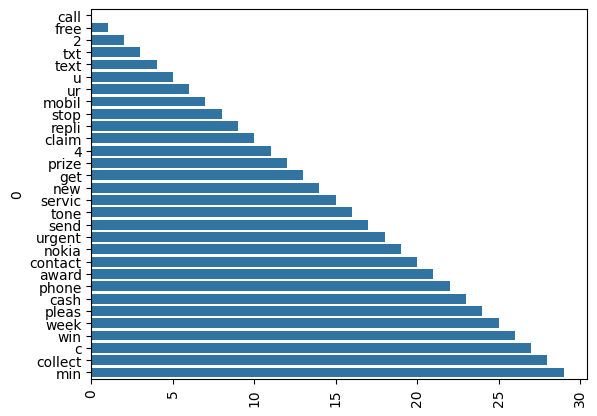

In [57]:

sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0])
plt.xticks(rotation='vertical')
plt.show()

In [58]:
ham_corpus=[]

for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

len(ham_corpus)

35404

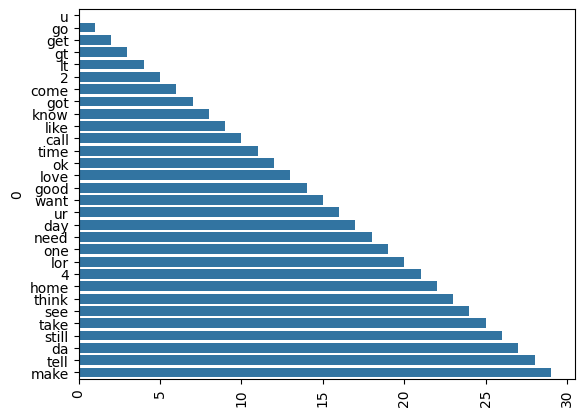

In [59]:

sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0])
plt.xticks(rotation='vertical')
plt.show()

## Model Building and Predicting

In [60]:
tfid=TfidfVectorizer()
X=tfid.fit_transform(df["transformed_text"]).toarray()
Y=df['target'].values

In [61]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

In [62]:
model1=mnb()
model1.fit(x_train,y_train)
p1=model1.predict(x_test)

print("accuracy_score :",accuracy_score(p1,y_test))
print("confusion_matrix :",confusion_matrix(p1,y_test))
print("precision_score",precision_score(p1,y_test))

accuracy_score : 0.9545454545454546
confusion_matrix : [[893  47]
 [  0  94]]
precision_score 0.6666666666666666


In [63]:
model2=gnb()
model2.fit(x_train,y_train)
p2=model2.predict(x_test)

print("accuracy_score :",accuracy_score(p2,y_test))
print("confusion_matrix :",confusion_matrix(p2,y_test))
print("precision_score",precision_score(p2,y_test))

accuracy_score : 0.8665377176015474
confusion_matrix : [[778  23]
 [115 118]]
precision_score 0.8368794326241135


In [64]:
model3=bnb()
model3.fit(x_train,y_train)
p3=model3.predict(x_test)

print("accuracy_score :",accuracy_score(p3,y_test))
print("confusion_matrix :",confusion_matrix(p3,y_test))
print("precision_score",precision_score(p3,y_test))
## Improving model

accuracy_score : 0.9661508704061895
confusion_matrix : [[887  29]
 [  6 112]]
precision_score 0.7943262411347518
